In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


aim ----> predict the tempreture

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


Data cleaning

In [58]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [59]:
dataset.drop(122,inplace=True)

In [60]:
dataset.reset_index(inplace=True)
dataset[dataset.isnull().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [61]:
dataset.iloc[120:130]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0
121,121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0
122,123,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
123,124,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
124,125,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1
125,126,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,1
126,127,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1
127,128,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,1
128,129,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,1
129,130,11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,fire,1


The dataset is converted in to two sets based on Region from 122th index, we can make a new column based on the Region 

1: "Bejaia Region Dataset"

2: "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [62]:
dataset.loc[:122,'Region']=0
dataset.loc[122:,'Region']=1
dataset['Region']=dataset['Region'].astype(int)

In [63]:
df=dataset
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        240 non-null    int64  
 1   day          240 non-null    int64  
 2   month        240 non-null    int64  
 3   year         240 non-null    int64  
 4   Temperature  240 non-null    int64  
 5   RH           240 non-null    int64  
 6   Ws           240 non-null    int64  
 7   Rain         240 non-null    float64
 8   FFMC         240 non-null    float64
 9   DMC          240 non-null    float64
 10  DC           240 non-null    float64
 11  ISI          240 non-null    float64
 12  BUI          240 non-null    float64
 13  FWI          240 non-null    float64
 14  Classes      240 non-null    object 
 15  Region       240 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.1+ KB


In [65]:
df.drop(['index'],axis=1,inplace=True)

In [66]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [67]:
df=df.dropna().reset_index(drop=True)

In [68]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [69]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [70]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1


In [71]:
df=df.drop(122).reset_index(drop=True)

In [72]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1


In [73]:
df.columns =df.columns.str.strip()

### changing the required columns as integer datatype

In [74]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          239 non-null    int64  
 1   month        239 non-null    int64  
 2   year         239 non-null    int64  
 3   Temperature  239 non-null    int64  
 4   RH           239 non-null    int64  
 5   Ws           239 non-null    int64  
 6   Rain         239 non-null    float64
 7   FFMC         239 non-null    float64
 8   DMC          239 non-null    float64
 9   DC           239 non-null    float64
 10  ISI          239 non-null    float64
 11  BUI          239 non-null    float64
 12  FWI          239 non-null    float64
 13  Classes      239 non-null    object 
 14  Region       239 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.1+ KB


### Changing the other columns to float datatype

In [76]:
objects = [features for features in df.columns if df[features].dtype=='O']
objects

['Classes']

In [77]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          239 non-null    int64  
 1   month        239 non-null    int64  
 2   year         239 non-null    int64  
 3   Temperature  239 non-null    int64  
 4   RH           239 non-null    int64  
 5   Ws           239 non-null    int64  
 6   Rain         239 non-null    float64
 7   FFMC         239 non-null    float64
 8   DMC          239 non-null    float64
 9   DC           239 non-null    float64
 10  ISI          239 non-null    float64
 11  BUI          239 non-null    float64
 12  FWI          239 non-null    float64
 13  Classes      239 non-null    object 
 14  Region       239 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.1+ KB


In [79]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,239.000000,239.000000,239.0,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.00000
mean,15.983264,7.527197,2012.0,32.184100,61.874477,15.531381,0.747699,78.137238,14.873640,50.094979,4.806276,16.911715,7.146862,0.48954
std,8.745211,1.106841,0.0,3.647204,14.877121,2.817647,2.006770,14.207014,12.404544,47.781891,4.158044,14.242210,7.451996,0.50094
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.00000
25%,8.500000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.650000,6.000000,14.700000,1.450000,6.200000,0.800000,0.00000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.400000,34.100000,3.700000,12.500000,4.900000,0.00000
75%,23.500000,8.500000,2012.0,35.000000,73.500000,17.000000,0.450000,88.300000,20.900000,71.150000,7.300000,22.900000,11.750000,1.00000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.00000


In [80]:
df.to_csv("Algerian_forest_fires_dataset.csv",index=False)

## EXPLORATORY DATA ANALYSIS

In [81]:
df_copy = df.drop(['day','month','year'],axis=1)

In [82]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [83]:
## categories in Classes
df_copy['Classes'].value_counts()


Classes
fire             131
not fire          97
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [84]:
## Encodiing of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains("not fire"),0,1)

In [85]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [86]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
234,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
235,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
236,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
237,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
238,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [87]:
df_copy['Classes'].value_counts()

Classes
1    137
0    102
Name: count, dtype: int64

In [88]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

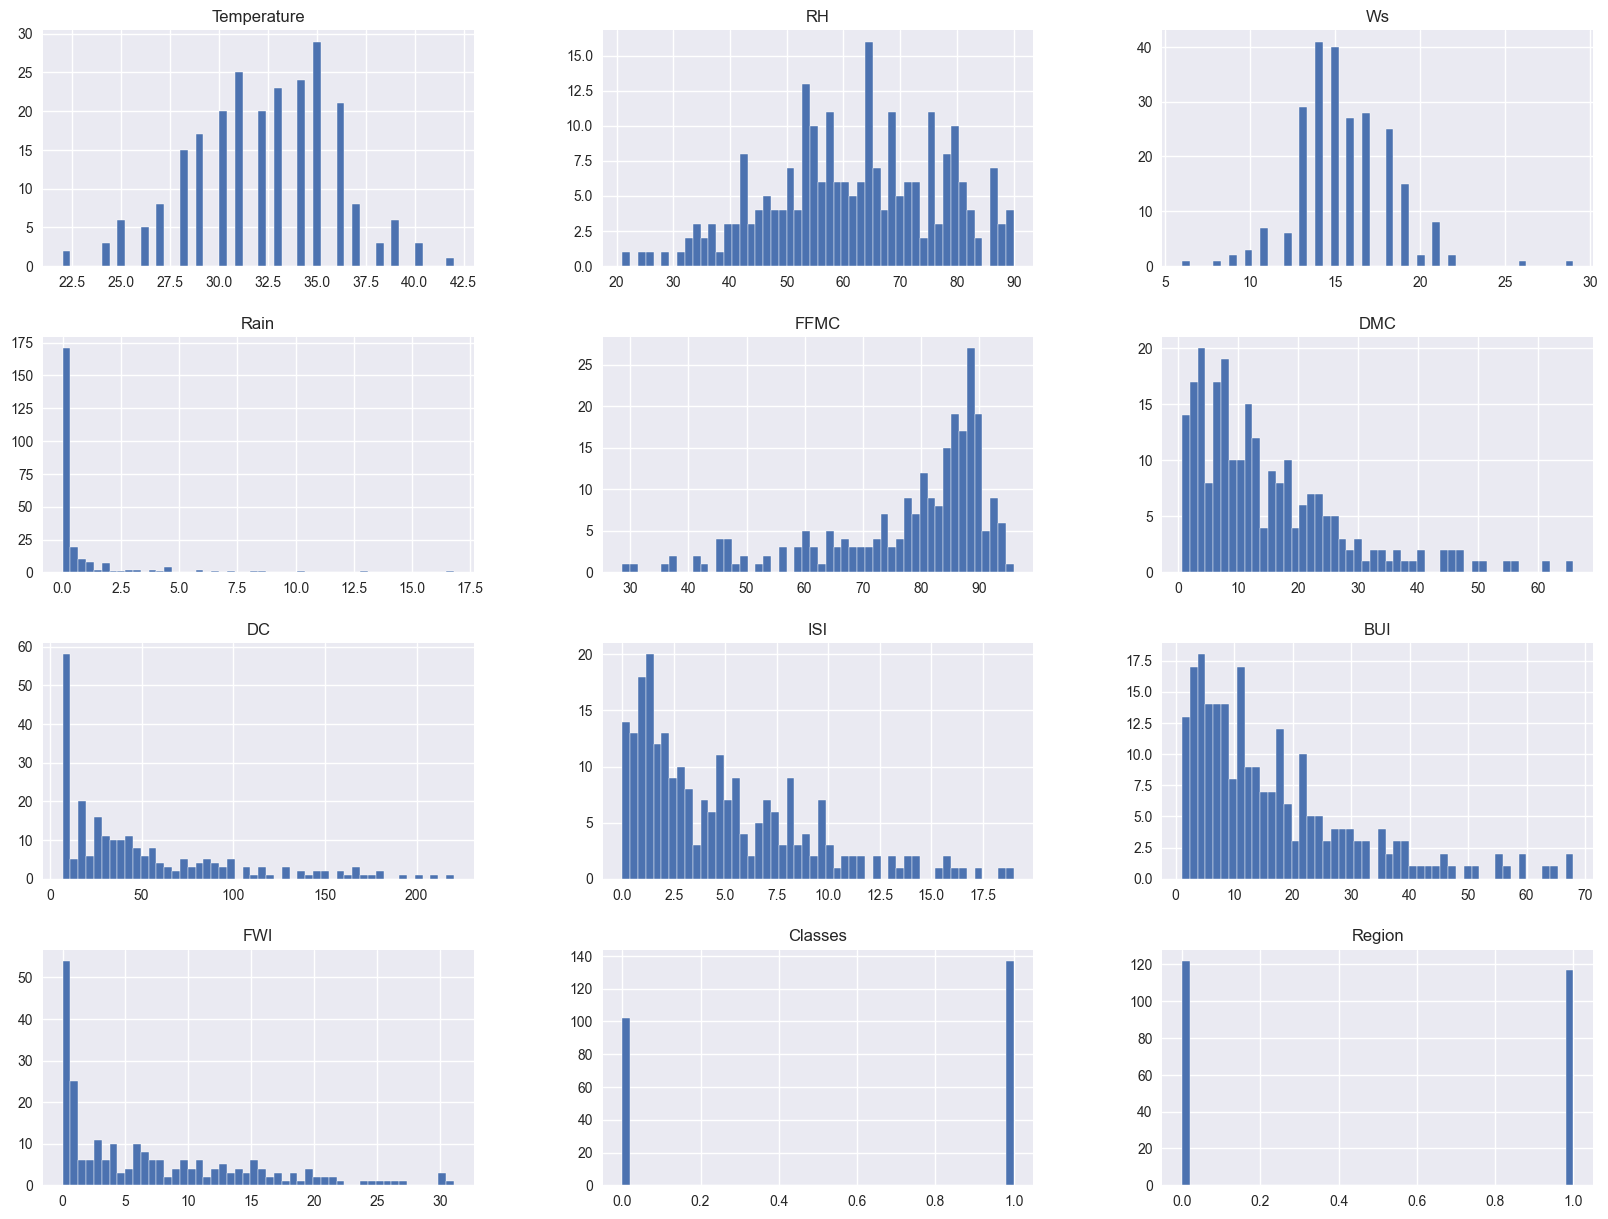

In [89]:
## plot density plot for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [90]:
## Percentage for pie chart

percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    57.322176
0    42.677824
Name: proportion, dtype: float64

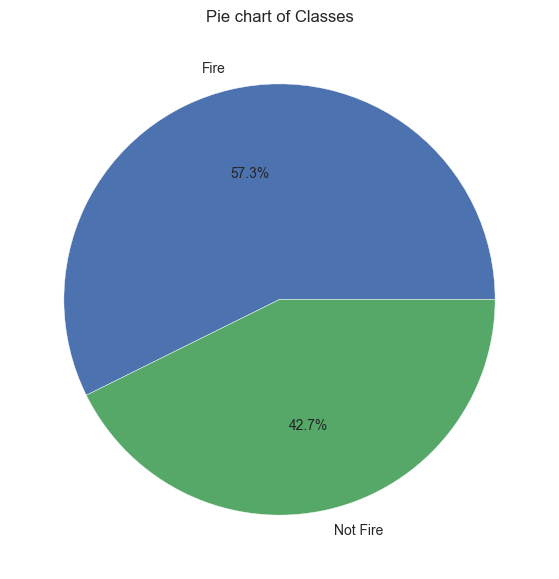

In [91]:
# Plotting Pie chart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")
plt.show()

## Correlation

In [92]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649959,-0.292901,-0.324292,0.679715,0.482547,0.372292,0.602058,0.456378,0.564333,0.513152,0.281626
RH,-0.649959,1.000000,0.255793,0.217034,-0.641020,-0.402459,-0.219565,-0.683738,-0.347168,-0.577377,-0.426107,-0.419638
Ws,-0.292901,0.255793,1.000000,0.180155,-0.188673,-0.013590,0.068632,-0.004195,0.019036,0.020521,-0.086645,-0.170189
Rain,-0.324292,0.217034,0.180155,1.000000,-0.541590,-0.284913,-0.294730,-0.343845,-0.296184,-0.321456,-0.376952,-0.048403
FFMC,0.679715,-0.641020,-0.188673,-0.541590,1.000000,0.598347,0.501330,0.737419,0.586600,0.689121,0.768235,0.249522
DMC,0.482547,-0.402459,-0.013590,-0.284913,0.598347,1.000000,0.874353,0.675742,0.981985,0.874118,0.578430,0.211090
DC,0.372292,-0.219565,0.068632,-0.294730,0.501330,0.874353,1.000000,0.502227,0.941297,0.736230,0.503657,-0.065654
ISI,0.602058,-0.683738,-0.004195,-0.343845,0.737419,0.675742,0.502227,1.000000,0.638867,0.921940,0.730969,0.283145
BUI,0.456378,-0.347168,0.019036,-0.296184,0.586600,0.981985,0.941297,0.638867,1.000000,0.855969,0.579437,0.106731
FWI,0.564333,-0.577377,0.020521,-0.321456,0.689121,0.874118,0.736230,0.921940,0.855969,1.000000,0.714711,0.215450


<Axes: >

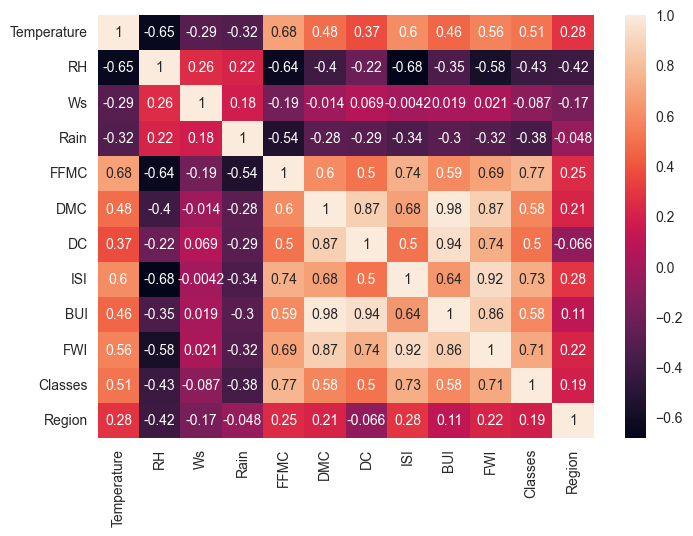

In [93]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

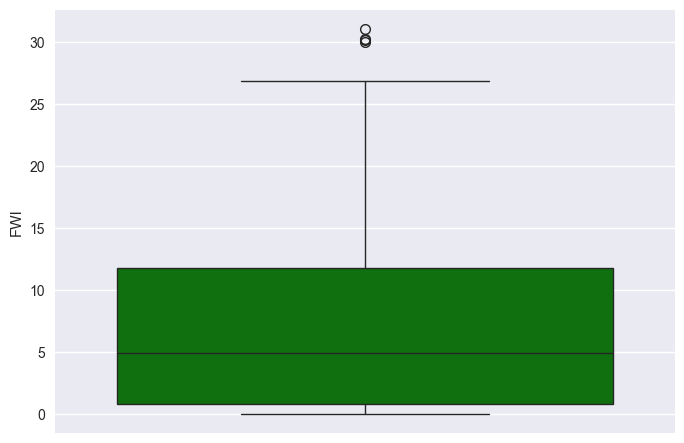

In [94]:
sns.boxplot(df_copy['FWI'],color='green')

## monthly fire analysis

In [95]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel regions')

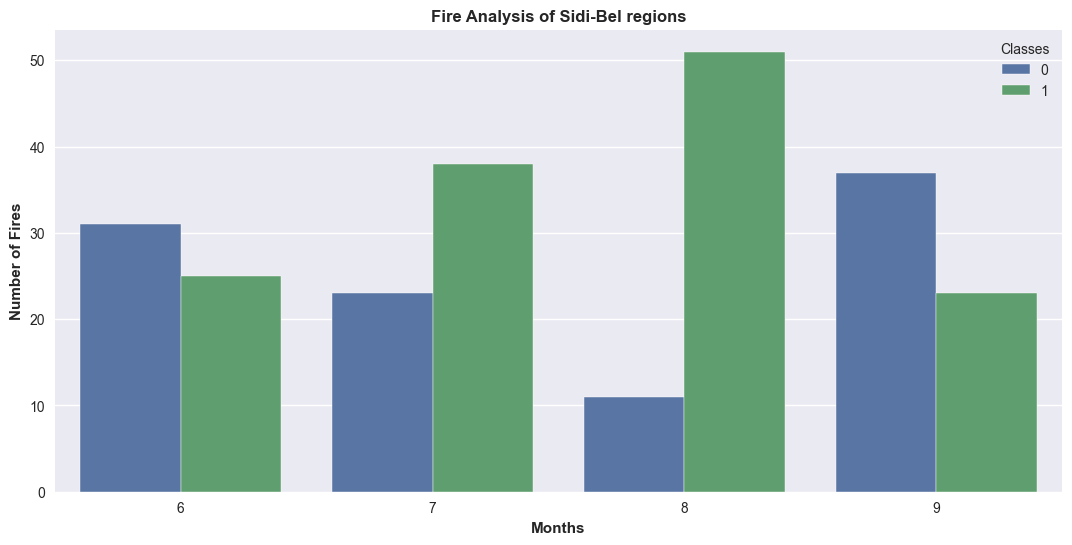

In [96]:
dftemp=df_copy.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel regions",weight='bold')

# Machine Learning with Linear Regression and ridge, Lasso, Elastic

In [98]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [99]:
#independent and dependent features
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [100]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [101]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
234    6.5
235    0.0
236    0.2
237    0.7
238    0.5
Name: FWI, Length: 239, dtype: float64

In [102]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [103]:
X_train.shape, X_test.shape


((179, 11), (60, 11))

In [104]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.641783,-0.308153,-0.296168,0.672432,0.448325,0.346342,0.584180,0.423963,0.500699,0.264776
RH,-0.641783,1.000000,0.268286,0.212271,-0.619837,-0.389257,-0.207393,-0.672540,-0.332784,-0.415186,-0.411179
Ws,-0.308153,0.268286,1.000000,0.214446,-0.170996,-0.013867,0.072870,0.001026,0.018106,-0.077091,-0.205473
Rain,-0.296168,0.212271,0.214446,1.000000,-0.537003,-0.271244,-0.289736,-0.337133,-0.283302,-0.376481,-0.047533
FFMC,0.672432,-0.619837,-0.170996,-0.537003,1.000000,0.597922,0.510460,0.741852,0.585002,0.763932,0.248456
DMC,0.448325,-0.389257,-0.013867,-0.271244,0.597922,1.000000,0.880141,0.685676,0.984064,0.591706,0.206719
DC,0.346342,-0.207393,0.072870,-0.289736,0.510460,0.880141,1.000000,0.524314,0.948444,0.521804,-0.088626
ISI,0.584180,-0.672540,0.001026,-0.337133,0.741852,0.685676,0.524314,1.000000,0.644623,0.738680,0.291946
BUI,0.423963,-0.332784,0.018106,-0.283302,0.585002,0.984064,0.948444,0.644623,1.000000,0.585566,0.101382
Classes,0.500699,-0.415186,-0.077091,-0.376481,0.763932,0.591706,0.521804,0.738680,0.585566,1.000000,0.169813


<Axes: >

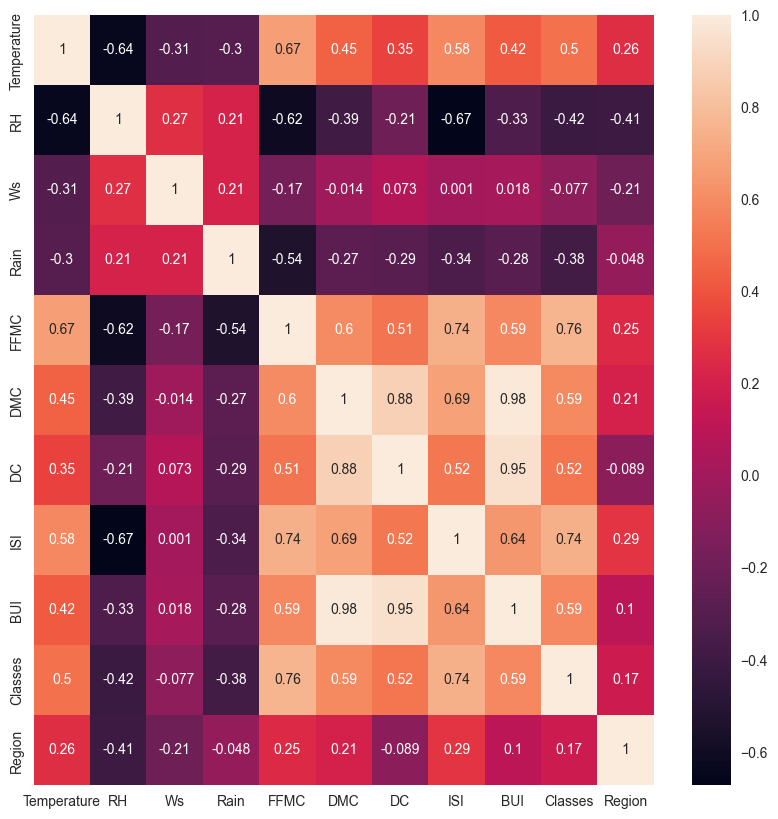

In [ ]:
# Checking multi-colinearity
plt.figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [110]:
corr_matrix = X_train.corr()
'''def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range()'''
corr_matrix.columns


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')